In [ ]:
# New
# Models and scores
# Total no of submissions this competition has got is 5558
#           Private   Public   Private_Rank   In_top%
# ML models
# 'M0.1' :  5.09      5.16
# 'M0.2' :  2.67      2.84

# 'M3.1' :  0.91      0.86     1980         35.62%
# 'M3.2' :  0.91      0.94
# 'M3.3' :  0.85      0.91
# 'M3.4' :  0.89      0.94
# 'M3.5' :  0.94      0.86
# 'M3.6' :  0.87      0.88

# 'M4.1' :  4.90      4.99
# 'M4.2' :  4.90      5.29

# 'M5.1' :  0.84      1.26      
# 'M5.2' :  0.95      1.11
# 'M5.3' :  5.05      4.93

# 'M7.1' :  0.73      0.92      757          13.62%
# 'M7.2' :  0.94      1.08      2150         37.78%


# Neural network models
# NN M3  :  1.12      0.99
# NN M4  :  0.82      1.21      1933         34%
# NN M5  :  1.90      1.70
# NN M6  :  3.58      4.30

<h1> Deep Learning Model 5

First score is Private and second score is Public score

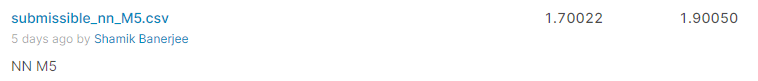

#### Installs and Imports

In [4]:
# ! wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.183 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-IN,en-GB;q=0.9,en-US;q=0.8,en;q=0.7" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/18599/1236839/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1605126035&Signature=aOgEZg5SLywSpDwccQBkRpQIFVxEOO814DAfMApvZdrwaTZDacrU45tsdAJqHsR3CLdNPfl81dc4YQyqGZ1SGXA5xHmdFaZhtAVnZbH7g2Tu8JCsQJArFgLcBbbTR2LLEYoztwKxFxu9Poyv9zNdAVTRuUQK6T98XACU5UCBw3GHj2nzXqmy5VCELiGH2ICLVGK3R5jzuAc7ddmXlnIDnWQqmteLGJnevCHqEjEsgTrwIGBbE2%2BBelWzZ4lQ2KMR0HAFluPiNUyV%2FJfY8leWijKkvy30pm4vibVevGvhvJR5%2BU2eyqfHdHZY4JVgrv0Y7%2BLUTeC7LpESnXGMsGZ4Yg%3D%3D&response-content-disposition=attachment%3B+filename%3Dm5-forecasting-accuracy.zip" -c -O 'm5-forecasting-accuracy.zip'

In [5]:
# !unzip m5-forecasting-accuracy.zip

# !apt-get update
# !apt-get install wget

# ! pip install pandas
# ! pip install calender
# ! pip install numpy
# ! pip install datetime
# ! pip install matplotlib
# ! pip install collections
# ! pip install random
# ! pip install tqdm
# ! pip install sklearn
# ! pip install lightgbm

In [1]:
# eval
#         xtr_from, xtr_to, ytr_to = 116, 453, 481
#         xtr_from, xtr_to, ytr_to = 481, 818, 846
#         xtr_from, xtr_to, ytr_to = 846, 1183, 1211
#         xtr_from, xtr_to, ytr_to = 1211, 1548, 1576

#         xte_from, xte_to = 1604, 1941
# val
#         xtr_from, xtr_to, ytr_to = 88, 425, 453
#         xtr_from, xtr_to, ytr_to = 453, 790, 818
#         xtr_from, xtr_to, ytr_to = 818, 1155, 1183
#         xtr_from, xtr_to, ytr_to = 1183, 1520, 1548

#         xte_from, xte_to = 1576, 1913

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras import activations
from IPython.display import clear_output as cclear
from tensorflow.keras import backend as K 
from tensorflow.keras.callbacks import ModelCheckpoint

class terminate_on_acc(tf.keras.callbacks.Callback):    
    def on_epoch_end(self, epoch, logs={}):
        loss = logs['loss']
        if loss < target_loss:
            self.model.stop_training = True
terminate_on_acc = terminate_on_acc()

n_steps_in, n_steps_out = 337, 28              # input is 1885 days, output 28 days
n_features = 1

#### Functions

In [2]:
def get_train_test(df, dept_df, model_no):
    if df.id.iloc[0].find('evaluation') != -1:                       # if evaluation data
        if model_no == 1:
            xtr_from, xtr_to, ytr_to = 116, 453, 481
        elif model_no == 2:
            xtr_from, xtr_to, ytr_to = 481, 818, 846
        elif model_no == 3:
            xtr_from, xtr_to, ytr_to = 846, 1183, 1211
        elif model_no == 4:
            xtr_from, xtr_to, ytr_to = 1211, 1548, 1576

        xte_from, xte_to = 1604, 1941                                 

    if df.id.iloc[0].find('validation') != -1:                       # if validation data
        if model_no == 1:
            xtr_from, xtr_to, ytr_to = 88, 425, 453
        elif model_no == 2:
            xtr_from, xtr_to, ytr_to = 453, 790, 818
        elif model_no == 3:
            xtr_from, xtr_to, ytr_to = 818, 1155, 1183
        elif model_no == 4:
            xtr_from, xtr_to, ytr_to = 1183, 1520, 1548

        xte_from, xte_to = 1576, 1913                                  
        
    X_train, y_train = dept_df.iloc[:, xtr_from:xtr_to], dept_df.iloc[:, xtr_to:ytr_to]
    X_test = dept_df.iloc[:, xte_from:xte_to]
    
    X_train, y_train, X_test = np.matrix(X_train).astype(np.float32), np.matrix(y_train).astype(np.float32),\
                               np.matrix(X_test).astype(np.float32)
    
    X_train, y_train = tf.convert_to_tensor(X_train), tf.convert_to_tensor(y_train)
    X_test = tf.convert_to_tensor(X_test)
    
    X_train = tf.reshape(X_train, shape = (X_train.shape[0], X_train.shape[1], n_features))
    y_train = tf.reshape(y_train, shape = (y_train.shape[0], y_train.shape[1], n_features))
    X_test = tf.reshape(X_train, shape = (X_train.shape[0], X_train.shape[1], n_features))
    
    return X_train, y_train, X_test

def fit_and_predict(X_train, y_train, X_test, model, epoch_no):
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=epoch_no, verbose=1, callbacks = [terminate_on_acc])
    print('Just making the predictions...')
    return model.predict(X_test)

In [3]:
def train_NN(df, dept_id, epoch_no, model):    
    
    dept_df = df[df.dept_id == dept_id]
    print('Working on Dept ', dept_id, 'Total rows to process ', len(dept_df))
    
    id_col = list(dept_df['id'])                       # we preserve the id_col to recreate the output later
    dept_df = dept_df.drop(['id','item_id','dept_id','cat_id','store_id','state_id'], 1)
    
    print('############################## Fitting and Predicting Model 1 ##############################')
    X_train, y_train, X_test = get_train_test(df, dept_df, 1)
    y_hat = fit_and_predict(X_train, y_train, X_test, model, epoch_no)
    print('')

    print('############################## Fitting and Predicting Model 2 ##############################')
    X_train, y_train, X_test = get_train_test(df, dept_df, 2)
    y_hat += fit_and_predict(X_train, y_train, X_test, model, epoch_no)
    print('')

    print('############################## Fitting and Predicting Model 3 ##############################')
    X_train, y_train, X_test = get_train_test(df, dept_df, 3)
    y_hat += fit_and_predict(X_train, y_train, X_test, model, epoch_no)
    print('')

    print('############################## Fitting and Predicting Model 4 ##############################')
    X_train, y_train, X_test = get_train_test(df, dept_df, 4)
    y_hat += fit_and_predict(X_train, y_train, X_test, model, epoch_no)
    print('')
    
    out_df = pd.DataFrame(y_hat/4)
    
    l = []                                              # In this part we rename the columns to F_1, F_2 ....
    for i in range(1,29):
        l.append('F'+str(i))
    out_df.columns = l
    out_df['id'] = id_col
    
    cols = list(out_df)                                           
    cols = [cols[-1]] + cols[:-1]
    out_df = out_df[cols]
    
    print('Writing output...')
    print('Done.')
    return out_df

#### Training for Evaluation Data

In [ ]:
df = pd.read_csv('sales_train_evaluation.csv')
dept_list = list(set(df.dept_id))
dept_list

In [ ]:
target_loss = 4    

model = Sequential()        
model.add(LSTM(5, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(2, activation='relu'))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')

In [9]:
dept_name_to_train = 'HOBBIES_1'

out_df = train_NN(df, dept_name_to_train, 5, model)
out_df.to_csv(str(dept_name_to_train)+'_m5_ev.csv', index=False)

Working on Dept  HOBBIES_1 Total rows to process  4160
############################## Fitting and Predicting Model 1 ##############################
Train on 4160 samples
Epoch 1/5
4160/4160 [==============================] - 72s 17ms/sample - loss: 3.8311
Just making the predictions...

############################## Fitting and Predicting Model 2 ##############################
Train on 4160 samples
Epoch 1/5
4160/4160 [==============================] - 72s 17ms/sample - loss: 5.1933
Epoch 2/5
4160/4160 [==============================] - 69s 17ms/sample - loss: 5.1943
Epoch 3/5
4160/4160 [==============================] - 69s 17ms/sample - loss: 5.1604
Epoch 4/5
4160/4160 [==============================] - 70s 17ms/sample - loss: 5.2051
Epoch 5/5
4160/4160 [==============================] - 69s 17ms/sample - loss: 5.2102
Just making the predictions...

############################## Fitting and Predicting Model 3 ##############################
Train on 4160 samples
Epoch 1/5
4160/4160 

In [10]:
dept_name_to_train = 'HOBBIES_2'

out_df = train_NN(df, dept_name_to_train, 5, model)
out_df.to_csv(str(dept_name_to_train)+'_m5_ev.csv', index=False)

Working on Dept  HOBBIES_2 Total rows to process  1490
############################## Fitting and Predicting Model 1 ##############################
Train on 1490 samples
Epoch 1/5
1490/1490 [==============================] - 28s 19ms/sample - loss: 0.4738
Just making the predictions...

############################## Fitting and Predicting Model 2 ##############################
Train on 1490 samples
Epoch 1/5
1490/1490 [==============================] - 29s 19ms/sample - loss: 0.6237
Just making the predictions...

############################## Fitting and Predicting Model 3 ##############################
Train on 1490 samples
Epoch 1/5
1490/1490 [==============================] - 28s 19ms/sample - loss: 0.3922
Just making the predictions...

############################## Fitting and Predicting Model 4 ##############################
Train on 1490 samples
Epoch 1/5
1490/1490 [==============================] - 28s 19ms/sample - loss: 0.6521
Just making the predictions...

Writing outpu

In [11]:
dept_name_to_train = 'HOUSEHOLD_1'

out_df = train_NN(df, dept_name_to_train, 5, model)
out_df.to_csv(str(dept_name_to_train)+'_m5_ev.csv', index=False)

Working on Dept  HOUSEHOLD_1 Total rows to process  5320
############################## Fitting and Predicting Model 1 ##############################
Train on 5320 samples
Epoch 1/5
5320/5320 [==============================] - 93s 18ms/sample - loss: 2.3560
Just making the predictions...

############################## Fitting and Predicting Model 2 ##############################
Train on 5320 samples
Epoch 1/5
5320/5320 [==============================] - 95s 18ms/sample - loss: 6.1160
Epoch 2/5
5320/5320 [==============================] - 93s 17ms/sample - loss: 5.9508
Epoch 3/5
5320/5320 [==============================] - 92s 17ms/sample - loss: 5.7914
Epoch 4/5
5320/5320 [==============================] - 93s 17ms/sample - loss: 5.0732
Epoch 5/5
5320/5320 [==============================] - 93s 17ms/sample - loss: 4.5021
Just making the predictions...

############################## Fitting and Predicting Model 3 ##############################
Train on 5320 samples
Epoch 1/5
5320/532

In [12]:
dept_name_to_train = 'HOUSEHOLD_2'

out_df = train_NN(df, dept_name_to_train, 5, model)
out_df.to_csv(str(dept_name_to_train)+'_m5_ev.csv', index=False)

Working on Dept  HOUSEHOLD_2 Total rows to process  5150
############################## Fitting and Predicting Model 1 ##############################
Train on 5150 samples
Epoch 1/5
5150/5150 [==============================] - 91s 18ms/sample - loss: 0.4062
Just making the predictions...

############################## Fitting and Predicting Model 2 ##############################
Train on 5150 samples
Epoch 1/5
5150/5150 [==============================] - 92s 18ms/sample - loss: 0.4677
Just making the predictions...

############################## Fitting and Predicting Model 3 ##############################
Train on 5150 samples
Epoch 1/5
5150/5150 [==============================] - 91s 18ms/sample - loss: 0.5204
Just making the predictions...

############################## Fitting and Predicting Model 4 ##############################
Train on 5150 samples
Epoch 1/5
5150/5150 [==============================] - 91s 18ms/sample - loss: 0.5606
Just making the predictions...

Writing out

In [6]:
dept_name_to_train = 'FOODS_1'

out_df = train_NN(df, dept_name_to_train, 5, model)
out_df.to_csv(str(dept_name_to_train)+'_m5_ev.csv', index=False)

Working on Dept  FOODS_1 Total rows to process  2160
############################## Fitting and Predicting Model 1 ##############################
Train on 2160 samples
Epoch 1/5
2160/2160 [==============================] - 41s 19ms/sample - loss: 11.6433
Epoch 2/5
2160/2160 [==============================] - 38s 18ms/sample - loss: 7.6292
Epoch 3/5
2160/2160 [==============================] - 38s 18ms/sample - loss: 5.8089
Epoch 4/5
2160/2160 [==============================] - 38s 18ms/sample - loss: 5.5550
Epoch 5/5
2160/2160 [==============================] - 38s 18ms/sample - loss: 5.4254
Just making the predictions...

############################## Fitting and Predicting Model 2 ##############################
Train on 2160 samples
Epoch 1/5
2160/2160 [==============================] - 40s 19ms/sample - loss: 6.0332
Epoch 2/5
2160/2160 [==============================] - 38s 18ms/sample - loss: 5.8647
Epoch 3/5
2160/2160 [==============================] - 38s 18ms/sample - loss: 5.8

In [7]:
dept_name_to_train = 'FOODS_2'

out_df = train_NN(df, dept_name_to_train, 5, model)
out_df.to_csv(str(dept_name_to_train)+'_m5_ev.csv', index=False)

Working on Dept  FOODS_2 Total rows to process  3980
############################## Fitting and Predicting Model 1 ##############################
Train on 3980 samples
Epoch 1/5
3980/3980 [==============================] - 72s 18ms/sample - loss: 2.6118
Just making the predictions...

############################## Fitting and Predicting Model 2 ##############################
Train on 3980 samples
Epoch 1/5
3980/3980 [==============================] - 72s 18ms/sample - loss: 3.3086
Just making the predictions...

############################## Fitting and Predicting Model 3 ##############################
Train on 3980 samples
Epoch 1/5
3980/3980 [==============================] - 72s 18ms/sample - loss: 2.7808
Just making the predictions...

############################## Fitting and Predicting Model 4 ##############################
Train on 3980 samples
Epoch 1/5
3980/3980 [==============================] - 73s 18ms/sample - loss: 2.8437
Just making the predictions...

Writing output.

In [ ]:
dept_name_to_train = 'FOODS_3'

out_df = train_NN(df, dept_name_to_train, 8, model)
out_df.to_csv(str(dept_name_to_train)+'_m5_ev.csv', index=False)

#### Training for Validation Data

In [4]:
df = pd.read_csv('sales_train_validation.csv')
dept_list = list(set(df.dept_id))
dept_list

['HOBBIES_2',
 'HOUSEHOLD_1',
 'FOODS_2',
 'FOODS_1',
 'FOODS_3',
 'HOUSEHOLD_2',
 'HOBBIES_1']

In [5]:
target_loss = 4    

model = Sequential()        
model.add(LSTM(5, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(2, activation='relu'))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')

In [7]:
dept_name_to_train = 'HOBBIES_1'

out_df = train_NN(df, dept_name_to_train, 5, model)
out_df.to_csv(str(dept_name_to_train)+'_m5_val.csv', index=False)

Working on Dept  HOBBIES_1 Total rows to process  4160
############################## Fitting and Predicting Model 1 ##############################
Train on 4160 samples
Epoch 1/5
4160/4160 [==============================] - 86s 21ms/sample - loss: 5.8809
Epoch 2/5
4160/4160 [==============================] - 77s 19ms/sample - loss: 5.7183
Epoch 3/5
4160/4160 [==============================] - 78s 19ms/sample - loss: 5.7148
Epoch 4/5
4160/4160 [==============================] - 78s 19ms/sample - loss: 5.7158
Epoch 5/5
4160/4160 [==============================] - 78s 19ms/sample - loss: 5.7175
Just making the predictions...

############################## Fitting and Predicting Model 2 ##############################
Train on 4160 samples
Epoch 1/5
4160/4160 [==============================] - 79s 19ms/sample - loss: 6.1390
Epoch 2/5
4160/4160 [==============================] - 76s 18ms/sample - loss: 6.1354
Epoch 3/5
4160/4160 [==============================] - 77s 18ms/sample - loss: 6.

In [8]:
dept_name_to_train = 'HOBBIES_2'

out_df = train_NN(df, dept_name_to_train, 5, model)
out_df.to_csv(str(dept_name_to_train)+'_m5_val.csv', index=False)

Working on Dept  HOBBIES_2 Total rows to process  1490
############################## Fitting and Predicting Model 1 ##############################
Train on 1490 samples
Epoch 1/5
1490/1490 [==============================] - 31s 21ms/sample - loss: 0.5565
Just making the predictions...

############################## Fitting and Predicting Model 2 ##############################
Train on 1490 samples
Epoch 1/5
1490/1490 [==============================] - 30s 20ms/sample - loss: 0.4748
Just making the predictions...

############################## Fitting and Predicting Model 3 ##############################
Train on 1490 samples
Epoch 1/5
1490/1490 [==============================] - 31s 21ms/sample - loss: 0.3713
Just making the predictions...

############################## Fitting and Predicting Model 4 ##############################
Train on 1490 samples
Epoch 1/5
1490/1490 [==============================] - 31s 21ms/sample - loss: 0.7652
Just making the predictions...

Writing outpu

In [9]:
dept_name_to_train = 'HOUSEHOLD_1'

out_df = train_NN(df, dept_name_to_train, 5, model)
out_df.to_csv(str(dept_name_to_train)+'_m5_val.csv', index=False)

Working on Dept  HOUSEHOLD_1 Total rows to process  5320
############################## Fitting and Predicting Model 1 ##############################
Train on 5320 samples
Epoch 1/5
5320/5320 [==============================] - 104s 20ms/sample - loss: 4.8621
Epoch 2/5
5320/5320 [==============================] - 100s 19ms/sample - loss: 4.8227
Epoch 3/5
5320/5320 [==============================] - 96s 18ms/sample - loss: 4.8213
Epoch 4/5
5320/5320 [==============================] - 96s 18ms/sample - loss: 4.8205
Epoch 5/5
5320/5320 [==============================] - 95s 18ms/sample - loss: 4.8185
Just making the predictions...

############################## Fitting and Predicting Model 2 ##############################
Train on 5320 samples
Epoch 1/5
5320/5320 [==============================] - 98s 18ms/sample - loss: 13.2893
Epoch 2/5
5320/5320 [==============================] - 96s 18ms/sample - loss: 13.2466
Epoch 3/5
5320/5320 [==============================] - 96s 18ms/sample - lo

In [10]:
dept_name_to_train = 'HOUSEHOLD_2'

out_df = train_NN(df, dept_name_to_train, 5, model)
out_df.to_csv(str(dept_name_to_train)+'_m5_val.csv', index=False)

Working on Dept  HOUSEHOLD_2 Total rows to process  5150
############################## Fitting and Predicting Model 1 ##############################
Train on 5150 samples
Epoch 1/5
5150/5150 [==============================] - 94s 18ms/sample - loss: 0.7103
Just making the predictions...

############################## Fitting and Predicting Model 2 ##############################
Train on 5150 samples
Epoch 1/5
5150/5150 [==============================] - 96s 19ms/sample - loss: 0.6427
Just making the predictions...

############################## Fitting and Predicting Model 3 ##############################
Train on 5150 samples
Epoch 1/5
5150/5150 [==============================] - 99s 19ms/sample - loss: 0.6978
Just making the predictions...

############################## Fitting and Predicting Model 4 ##############################
Train on 5150 samples
Epoch 1/5
5150/5150 [==============================] - 94s 18ms/sample - loss: 0.8399
Just making the predictions...

Writing out

In [ ]:
dept_name_to_train = 'FOODS_1'

out_df = train_NN(df, dept_name_to_train, 5, model)
out_df.to_csv(str(dept_name_to_train)+'_m5_val.csv', index=False)

Working on Dept  FOODS_1 Total rows to process  2160
############################## Fitting and Predicting Model 1 ##############################
Train on 2160 samples
Epoch 1/5
2160/2160 [==============================] - 42s 19ms/sample - loss: 14.3331
Epoch 2/5
2160/2160 [==============================] - 39s 18ms/sample - loss: 13.9233
Epoch 3/5
2160/2160 [==============================] - 40s 18ms/sample - loss: 13.8894
Epoch 4/5
2160/2160 [==============================] - 40s 18ms/sample - loss: 13.8783
Epoch 5/5
2160/2160 [==============================] - 40s 19ms/sample - loss: 13.8816
Just making the predictions...

############################## Fitting and Predicting Model 2 ##############################
Train on 2160 samples
Epoch 1/5
2160/2160 [==============================] - 42s 20ms/sample - loss: 10.5041
Epoch 2/5
2160/2160 [==============================] - 39s 18ms/sample - loss: 10.4502
Epoch 3/5
2160/2160 [==============================] - 39s 18ms/sample - los

In [ ]:
dept_name_to_train = 'FOODS_2'

out_df = train_NN(df, dept_name_to_train, 5, model)
out_df.to_csv(str(dept_name_to_train)+'_m5_val.csv', index=False)

In [ ]:
dept_name_to_train = 'FOODS_3'

out_df = train_NN(df, dept_name_to_train, 10, model)
out_df.to_csv(str(dept_name_to_train)+'_m5_val.csv', index=False)

#### Merging outputs for all departments

In [2]:
def fun(name):
    return pd.read_csv(name+'.csv')

food1ev, food2ev, food3ev = fun('FOODS_1_m5_ev'), fun('FOODS_2_m5_ev'), fun('FOODS_3_m5_ev')
hobbies1ev, hobbies2ev = fun('HOBBIES_1_m5_ev'), fun('HOBBIES_2_m5_ev')
house1ev, house2ev = fun('HOUSEHOLD_1_m5_ev'), fun('HOUSEHOLD_2_m5_ev')

food1val, food2val, food3val = fun('FOODS_1_m5_val'), fun('FOODS_2_m5_val'), fun('FOODS_3_m5_val')
hobbies1val, hobbies2val = fun('HOBBIES_1_m5_val'), fun('HOBBIES_2_m5_val')
house1val, house2val = fun('HOUSEHOLD_1_m5_val'), fun('HOUSEHOLD_2_m5_val')

In [3]:
main_out_df_ev = pd.concat([food1ev, food2ev, food3ev, hobbies1ev, hobbies2ev, house1ev, house2ev], 
                           ignore_index=False)
main_out_df_val = pd.concat([food1val, food2val, food3val, hobbies1val, hobbies2val, house1val, house2val],
                            ignore_index=False)

In [4]:
def reorder(df, main_out):
    df['sp_index'] = (df.index)
    index_dict = dict(zip(df.id, df.sp_index))
    df = df.drop('sp_index', axis=1)
    main_out['sp_index'] = main_out["id"].map(index_dict)
    main_out = main_out.sort_values(by='sp_index', axis=0)
    main_out = main_out.drop('sp_index', axis=1)
    return main_out

In [5]:
out_1 = reorder(pd.read_csv('sales_train_evaluation.csv'), main_out_df_ev)
out_2 = reorder(pd.read_csv('sales_train_validation.csv'), main_out_df_val)

In [6]:
df = pd.concat([out_1, out_2], ignore_index=False)
df.to_csv('submissible_nn_M5.csv')

In [7]:
df = df.round(2)
df.to_csv('submissible_nn_M5.csv')

In [8]:
df

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_evaluation,0.59,0.54,0.57,0.48,0.43,0.55,0.57,0.58,0.62,...,0.47,0.52,0.55,0.56,0.55,0.52,0.49,0.45,0.52,0.53
1,HOBBIES_1_002_CA_1_evaluation,0.53,0.54,0.54,0.43,0.38,0.44,0.44,0.50,0.53,...,0.50,0.52,0.53,0.53,0.59,0.55,0.52,0.45,0.49,0.46
2,HOBBIES_1_003_CA_1_evaluation,0.45,0.43,0.49,0.38,0.33,0.40,0.41,0.45,0.49,...,0.38,0.40,0.40,0.41,0.44,0.41,0.38,0.34,0.38,0.36
3,HOBBIES_1_004_CA_1_evaluation,1.65,1.40,1.31,1.30,1.22,1.61,1.77,1.70,1.53,...,1.34,1.45,1.63,1.81,1.52,1.43,1.49,1.29,1.53,1.78
4,HOBBIES_1_005_CA_1_evaluation,0.98,0.95,0.83,0.72,0.67,0.85,0.90,0.95,0.89,...,0.90,0.96,1.02,1.05,1.04,0.97,0.97,0.86,0.96,1.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8225,FOODS_3_823_WI_3_validation,2.19,2.33,2.04,2.11,1.99,2.24,2.14,2.42,2.63,...,1.88,1.86,2.01,2.30,2.22,2.15,1.96,1.74,1.78,1.93
8226,FOODS_3_824_WI_3_validation,2.19,2.33,2.04,2.11,1.99,2.24,2.14,2.42,2.63,...,1.88,1.86,2.01,2.30,2.22,2.15,1.96,1.74,1.78,1.93
8227,FOODS_3_825_WI_3_validation,2.19,2.33,2.04,2.11,1.99,2.24,2.14,2.42,2.63,...,1.88,1.86,2.01,2.30,2.22,2.15,1.96,1.74,1.78,1.93
8228,FOODS_3_826_WI_3_validation,2.19,2.33,2.04,2.11,1.99,2.24,2.14,2.42,2.63,...,1.88,1.86,2.01,2.30,2.22,2.15,1.96,1.74,1.78,1.93
